In [ ]:
Non-Performing Loans (NPL) atau kredit macet sering terjadi ketika debitur tidak mampu membayar kembali pinjaman sesuai tanggal yang disepakati.
Jika NPL meningkat, hal tersebut akan memengaruhi kesehatan bank, karena cadangan untuk kerugian pinjaman harus ditingkatkan dan menyebabkan likuiditas bank berkurang.

Pada kasus kali ini, dibuat model epidemik SIS sebagai berikut:
S (Susceptible) : Bank sehat rentan terinfeksi oleh penyebaran NPL
I (Infected)    : Bank sudah terinfeksi oleh penyebaran NPL
A               : Laju bank baru dan sehat masuk ke dalam sistem
beta            : Laju penyebaran infeksi NPL
delta           : Laju pemulihan bank semu
myu1            : Laju kebangkrutan bank akibat NPL tinggi
myu2            : Laju kebangkrutan bank akibat risiko eksternal/makro ekonomi yang merugikan

Pada periode tertentu, dapat terjadi lonjakan NPL, seperti adanya krisis ekonomi, fluktuasi harga komoditas, atau ketidakstabilan di sektor-sektor tertentu (seperti properti atau infrastruktur)
Di Indonesia sendiri, dapat terjadi adanya penurunan harga properti, penurunan daya beli masyrakat, atau kegagalan di sektor manifaktor yang dapat mengakibatkan perusahaan gagal bayar

Pada model epidemik :
dS/dt = A - betaSI + deltaI - myu2S

dI/dt = betaSI - myu1I - deltaI


######################################################################################################################################################################################################3
######################################################################################################################################################################################################3
######################################################################################################################################################################################################3


Lalu, jika terdapat variabel baru berupa Bank yang pulih (R) maka bentuk model epidemik menjadi SIRS, ilustrasinya sebagai berikut:
S (Susceptible) : Bank sehat rentan terinfeksi oleh penyebaran NPL
I (Infected)    : Bank sudah terinfeksi oleh penyebaran NPL
R (Recovered)   : Bank yang berhasil pulih dari penyebaran NPL​
A               : Laju bank baru dan sehat masuk ke dalam sistem
beta            : Laju penyebaran infeksi NPL
delta           : Laju pemulihan bank
epsilon         : Laju kembali ke kondisi rentan setelah pemulihan
myu1            : Laju kebangkrutan bank akibat NPL tinggi
myu2            : Laju kebangkrutan bank akibat risiko eksternal/ekonomi makro yang merugikan
myu3            : Laju kebangkrutan bank akibat risiko internal


Pada model epidemik :
dS/dt = A - betaSI + deltaI - myu2S + epsilonR

dI/dt = betaSI - myu1I - deltaI

dR/dt = deltaI - epsilonR - myu3R


######################################################################################################################################################################################################3
######################################################################################################################################################################################################3
######################################################################################################################################################################################################3



Contoh kasus lainnya di Indonesia:
Misalkan di Indonesia terjadi penurunan harga properti yang sangat tajam, menyebabkan banyak debitur yang mengajukan pinjaman unntuk membeli rumah namun debitur tidak dapat membayar cicilan mereka
Hal tersebut dapat mengakibatkan lonjakan NPL di sektor perbankan

Seiring waktu, beberapa bank sehat mulai terpapar oleh risiko NPL dari bank-bank yang sudah terinfeksi, terutama untuk bank yang memiliki hubungan bisnis dengan sektor properti atau pasar interbank.
1. Interaksi pasar interbank      : Bank-bank yang sehat dapat terpapar oleh NPL dari bank terinfeksi yang berutang di pasar uang atau memiliki hubungan bisnis
2. Sektor yang terinfeksi         : Bank yang terinfeksi mungkin sudah mengalokasikan pinjaman ke sektor properti atau manufaktur yang terpuruk, sehingga bank sehat yang memiliki portofolio sama mulai memiliki masalah yang sama

#

  ## Kasus 1 : Sistem 2 Dimensi

#### 1.) Saat Ro < 1

<function matplotlib.pyplot.show(close=None, block=None)>

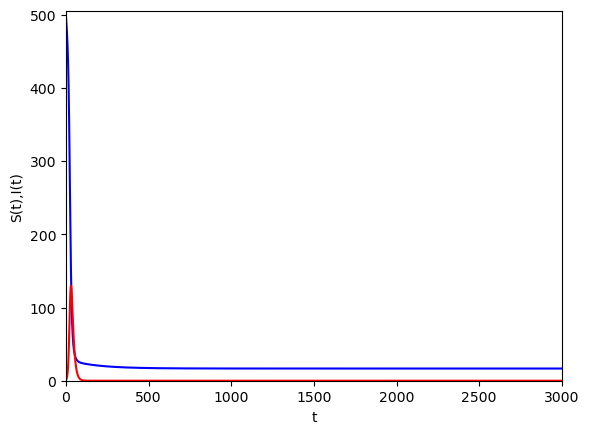

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


def spd(z,t) :
    A = 0.1
    beta = 0.0007
    delta = 0.1
    mu1 = 0.005
    mu2 = 0.006

    S = z[0]
    I = z[1]

    dSdt = A - beta*S*I - mu2*S
    dIdt = beta*S*I - mu1*I - delta*I

    return [dSdt, dIdt]


x0 = [499,1]
t = np.linspace(0,3000,100000)
solusi = odeint(spd,x0,t)

S = solusi[:,0]
I = solusi[:,1]

fig, ax = plt.subplots(dpi=100)
ax.plot(t,S,color='blue', label='Susceptible')
ax.plot(t,I,color='red', label='Infected')

ax.set(xlabel='t',ylabel='S(t),I(t)')
ax.set_xlim([0, 3000])
ax.set_ylim([0, 505])

#fig.savefig("test.png",dpi=800)
plt.show

Dapat terlihat bahwa Bank Terinfeksi punah saat Ro < 1.

#### Potret Fase Saat Ro < 1

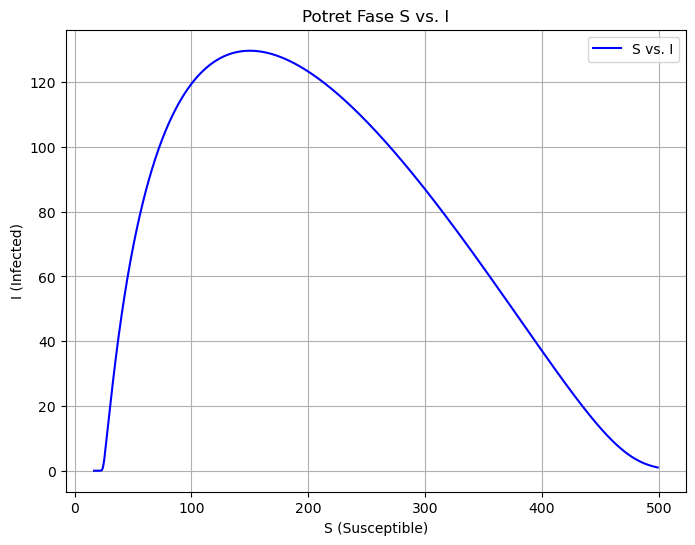

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Definisi model dengan dua variabel (S, I)
def spd(z, t):
    A = 0.1
    beta = 0.0007
    delta = 0.1
    mu1 = 0.005
    mu2 = 0.006

    S = z[0]
    I = z[1]

    dSdt = A - beta * S * I - mu2 * S
    dIdt = beta * S * I - mu1 * I - delta * I

    return [dSdt, dIdt]

# Kondisi awal dan waktu
x0 = [499, 1]
t = np.linspace(0, 3000, 100000)

# Solusi numerik
solusi = odeint(spd, x0, t)
S = solusi[:, 0]
I = solusi[:, 1]

# Plot potret fase S vs I
plt.figure(figsize=(8, 6))
plt.plot(S, I, color='blue', label='S vs. I')
plt.xlabel("S (Susceptible)")
plt.ylabel("I (Infected)")
plt.title("Potret Fase S vs. I")
plt.grid()
plt.legend()
plt.show()


Hubungan antara Bank Rentan dan Bank Terinfeksi adalah sebagai berikut.

#### 2.) Saat Ro > 1

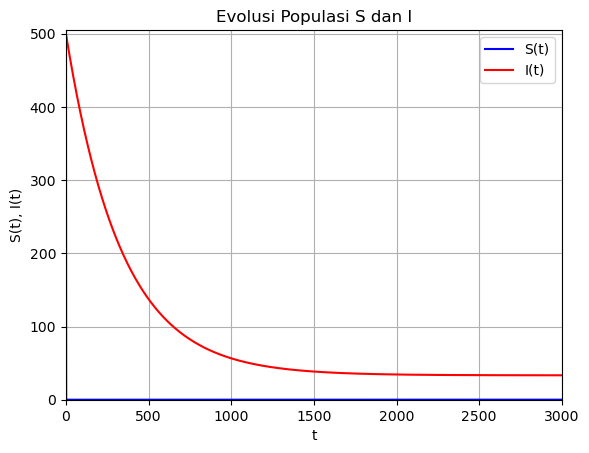

In [ ]:
def spd(z, t):
    A = 0.1
    beta = 0.05  # Laju penularan ditingkatkan
    delta = 0.002  # Tingkat kematian diturunkan
    mu1 = 0.001  # Tingkat penyembuhan tetap
    mu2 = 0.001

    S = z[0]
    I = z[1]

    dSdt = A - beta * S * I - mu2 * S
    dIdt = beta * S * I - mu1 * I - delta * I

    return [dSdt, dIdt]

# Kondisi awal
x0 = [499, 1]  # Populasi rentan tinggi
t = np.linspace(0, 3000, 100000)
solusi = odeint(spd, x0, t)

S = solusi[:, 0]
I = solusi[:, 1]

# Plot
fig, ax = plt.subplots(dpi=100)
ax.plot(t, S, color='blue', label='S(t)')
ax.plot(t, I, color='red', label='I(t)')

ax.set(xlabel='t', ylabel='S(t), I(t)', title='Evolusi Populasi S dan I')
ax.set_xlim([0, 3000])
ax.set_ylim([0, 505])
ax.legend()
plt.grid()
plt.show()


Terlihat bahwa bank terinfeksi tidak punah saat Ro > 1.

#### Potret Fase Saat Ro > 1

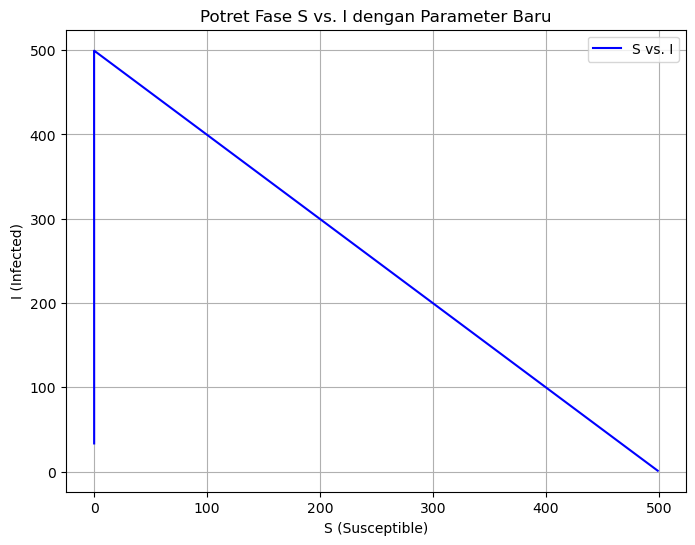

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Definisi model dengan parameter yang diminta
def spd(z, t):
    A = 0.1
    beta = 0.05
    delta = 0.002
    mu1 = 0.001
    mu2 = 0.001

    S = z[0]
    I = z[1]

    dSdt = A - beta * S * I - mu2 * S
    dIdt = beta * S * I - mu1 * I - delta * I

    return [dSdt, dIdt]

# Kondisi awal dan waktu
x0 = [499, 1]
t = np.linspace(0, 3000, 100000)

# Solusi numerik
solusi = odeint(spd, x0, t)
S = solusi[:, 0]
I = solusi[:, 1]

# Plot potret fase S vs I
plt.figure(figsize=(8, 6))
plt.plot(S, I, color='blue', label='S vs. I')
plt.xlabel("S (Susceptible)")
plt.ylabel("I (Infected)")
plt.title("Potret Fase S vs. I dengan Parameter Baru")
plt.grid()
plt.legend()
plt.show()


Hubungan antara Bank Rentan dan Bank Terinfeksi adalah sebagai berikut.

#### Analisis Sensitivitas 2D

Analisis Sensitivitas terhadap Beta:
Beta = 0.0005, Sensitivitas = 1.0000
Beta = 0.0007, Sensitivitas = 1.0000
Beta = 0.0009, Sensitivitas = 1.0000


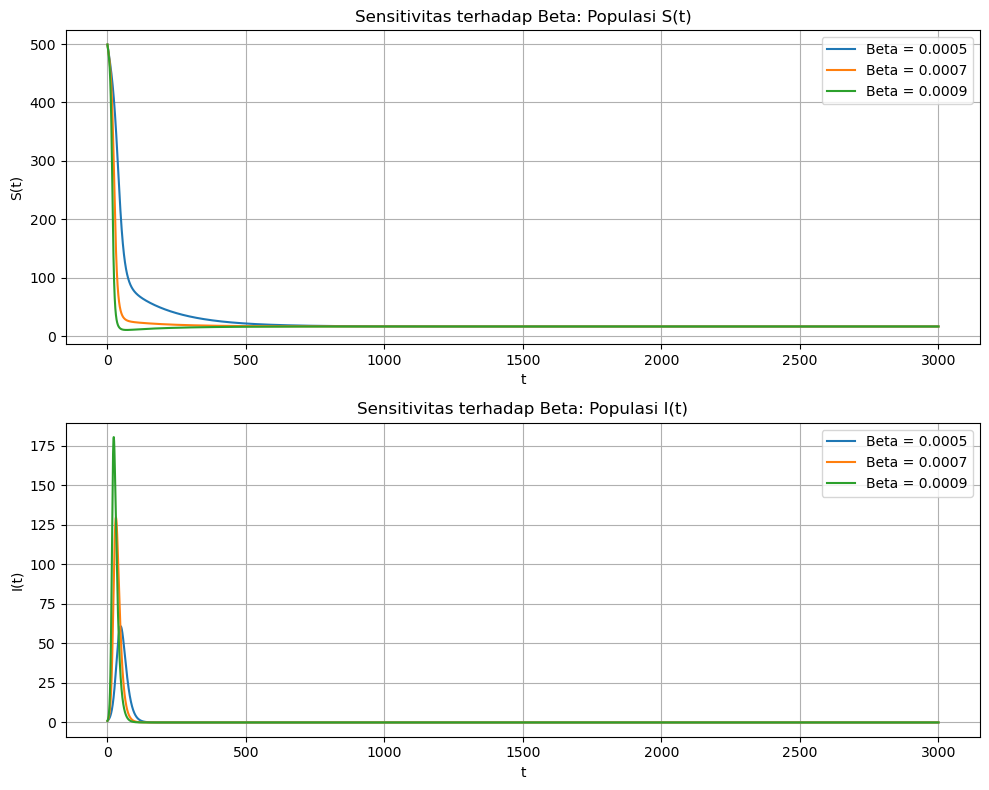

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def spd(z, t, A, beta, delta, mu1, mu2):
    S = z[0]
    I = z[1]

    dSdt = A - beta * S * I - mu2 * S
    dIdt = beta * S * I - mu1 * I - delta * I

    return [dSdt, dIdt]

def R0(A, beta, delta, mu1, mu2):
    # Perbaikan R0 dengan parameter A dan mu2 dikalikan secara eksplisit
    return (beta * A) / (mu2 * (mu1 + delta))

def sensitivity_R0(A, beta, delta, mu1, mu2, param_name, param_value):
    # Partial derivatives
    if param_name == 'beta':
        dR0_dp =  A / (mu2 * (mu1 + delta))
    elif param_name == 'mu1':
        dR0_dp = -(beta * A) / (mu2 * (mu1 + delta)**2)
    elif param_name == 'delta':
        dR0_dp = -(beta * A) / (mu2 * (mu1 + delta)**2)
    else:
        raise ValueError("Parameter not recognized")

    R0_value = R0(A, beta, delta, mu1, mu2)
    sensitivity = dR0_dp * (param_value / R0_value)
    return sensitivity

# Parameter default
A = 0.1
beta_values = [0.0005, 0.0007, 0.0009]  # Variasi beta
delta = 0.1
mu1 = 0.005
mu2 = 0.006

# Initial condition
x0 = [499, 1]

# Time points
t = np.linspace(0, 3000, 100000)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=100)

for beta in beta_values:
    solusi = odeint(spd, x0, t, args=(A, beta, delta, mu1, mu2))
    S = solusi[:, 0]
    I = solusi[:, 1]

    ax[0].plot(t, S, label=f"Beta = {beta}")
    ax[1].plot(t, I, label=f"Beta = {beta}")

# Sensitivity analysis
print("Analisis Sensitivitas terhadap Beta:")
for beta in beta_values:
    sens = sensitivity_R0(A, beta, delta, mu1, mu2, 'beta', beta)
    print(f"Beta = {beta}, Sensitivitas = {sens:.4f}")

# Configure plots
ax[0].set_title('Sensitivitas terhadap Beta: Populasi S(t)')
ax[0].set(xlabel='t', ylabel='S(t)')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Sensitivitas terhadap Beta: Populasi I(t)')
ax[1].set(xlabel='t', ylabel='I(t)')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()


Berikut adalah hasil analisis sensitivitas, dimana semakin besar nilai beta maka Bank Rentan akan semakin cepat turun. Sedangkan saat semakin besar nilai beta maka Bank Terinfeksi akan semakin cepat meningkat.

#

## Kasus 2 : Sistem 3 Dimensi

#### 1.) Saat Ro < 1

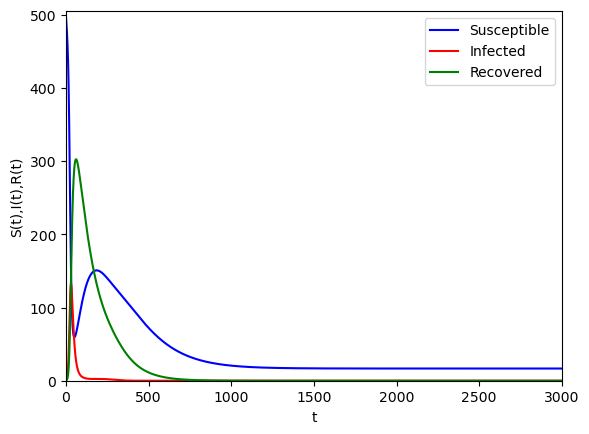

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def spd(z,t) :
    A = 0.1
    beta = 0.0007
    delta = 0.1
    mu1 = 0.005
    mu2 = 0.006
    mu3 = 0.001
    epsilon = 0.008

    S = z[0]
    I = z[1]
    R = z[2]

    dSdt = A - beta*S*I - mu2*S + epsilon*R
    dIdt = beta*S*I - mu1*I - delta*I
    dRdt = delta*I - epsilon*R - mu3*R

    return [dSdt, dIdt, dRdt]

x0 = [499,1,0]
t = np.linspace(0,3000,100000)
solusi = odeint(spd,x0,t)
S = solusi[:,0]
I = solusi[:,1]
R = solusi[:,2]

fig, ax = plt.subplots(dpi=100)
ax.plot(t,S,color='blue', label='Susceptible')
ax.plot(t,I,color='red', label='Infected')
ax.plot(t,R,color='green', label='Recovered')

ax.set(xlabel='t',ylabel='S(t),I(t),R(t)')
ax.set_xlim([0, 3000])
ax.set_ylim([0, 505])

#fig.savefig("test.png",dpi=800)
ax.legend()
plt.show()

Dapat terlihat bahwa Bank Terinfeksi punah saat Ro < 1. Tersisa Bank Rentan.

#### Potret Fase Saat Ro < 1

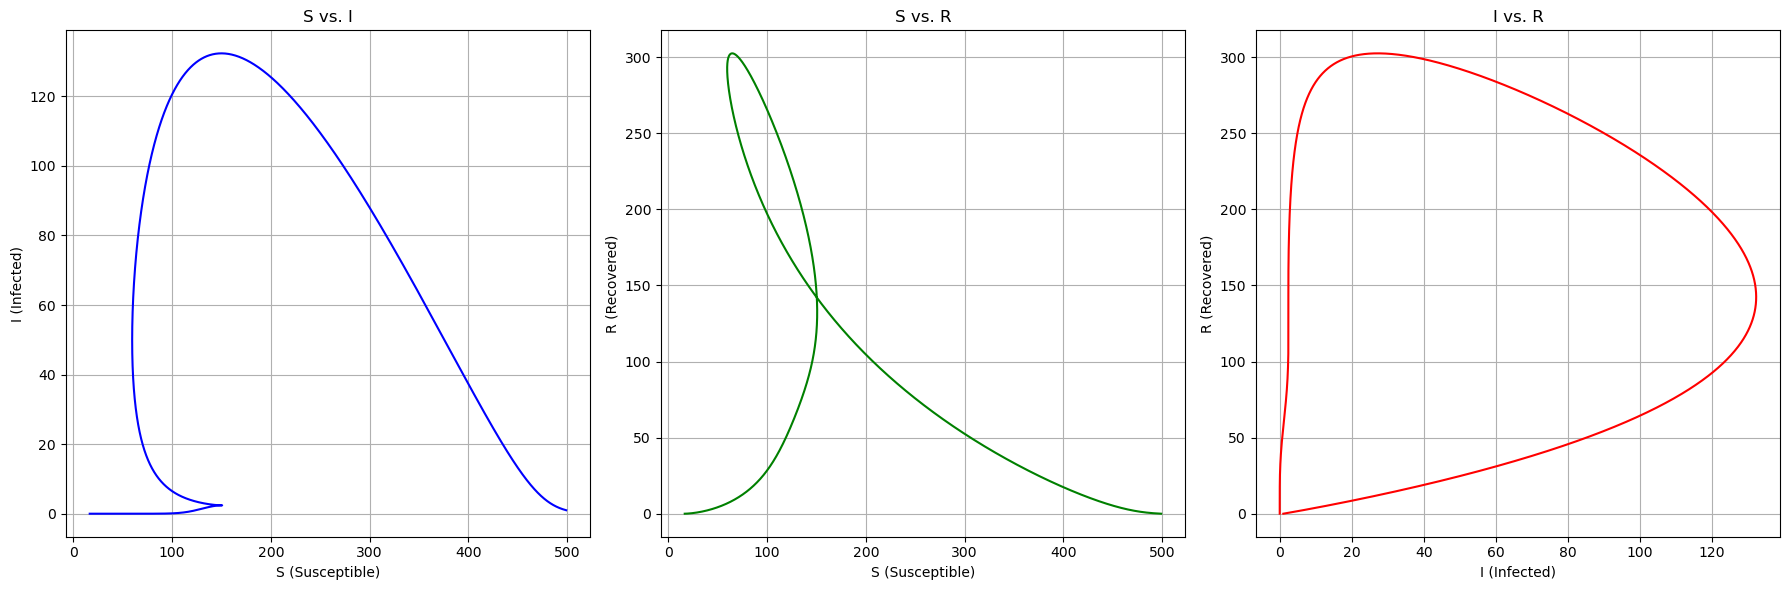

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Definisi parameter model
def spd(z, t):
    A = 0.1
    beta = 0.0007
    delta = 0.1
    mu1 = 0.005
    mu2 = 0.006
    mu3 = 0.001
    epsilon = 0.008

    S = z[0]
    I = z[1]
    R = z[2]

    dSdt = A - beta * S * I - mu2 * S + epsilon * R
    dIdt = beta * S * I - mu1 * I - delta * I
    dRdt = delta * I - epsilon * R - mu3 * R

    return [dSdt, dIdt, dRdt]

# Kondisi awal
x0 = [499, 1, 0]
t = np.linspace(0, 3000, 100000)

# Solusi numerik
solusi = odeint(spd, x0, t)
S = solusi[:, 0]
I = solusi[:, 1]
R = solusi[:, 2]

# Plot potret fase
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# S vs. I
axs[0].plot(S, I, color='blue')
axs[0].set_title("S vs. I")
axs[0].set_xlabel("S (Susceptible)")
axs[0].set_ylabel("I (Infected)")
axs[0].grid()

# S vs. R
axs[1].plot(S, R, color='green')
axs[1].set_title("S vs. R")
axs[1].set_xlabel("S (Susceptible)")
axs[1].set_ylabel("R (Recovered)")
axs[1].grid()

# I vs. R
axs[2].plot(I, R, color='red')
axs[2].set_title("I vs. R")
axs[2].set_xlabel("I (Infected)")
axs[2].set_ylabel("R (Recovered)")
axs[2].grid()

plt.tight_layout()
plt.show()


Berikut adalah potret fase hubungan antara S vs I, S vs R, dan I vs R.

#### 2.) Saat Ro < 1

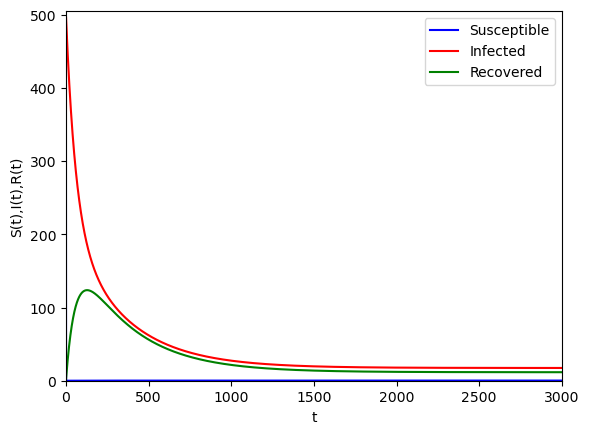

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def spd(z,t) :
    A = 0.1
    beta = 0.05
    delta = 0.006
    mu1 = 0.005
    mu2 = 0.006
    mu3 = 0.001
    epsilon = 0.008

    S = z[0]
    I = z[1]
    R = z[2]

    dSdt = A - beta*S*I - mu2*S + epsilon*R
    dIdt = beta*S*I - mu1*I - delta*I
    dRdt = delta*I - epsilon*R - mu3*R

    return [dSdt, dIdt, dRdt]

x0 = [499,1,0]
t = np.linspace(0,3000,100000)
solusi = odeint(spd,x0,t)
S = solusi[:,0]
I = solusi[:,1]
R = solusi[:,2]

fig, ax = plt.subplots(dpi=100)
ax.plot(t,S,color='blue', label='Susceptible')
ax.plot(t,I,color='red', label='Infected')
ax.plot(t,R,color='green', label='Recovered')

ax.set(xlabel='t',ylabel='S(t),I(t),R(t)')
ax.set_xlim([0, 3000])
ax.set_ylim([0, 505])

#fig.savefig("test.png",dpi=800)
ax.legend()
plt.show()

Dapat terlihat bahwa Bank Terinfeksi dan Bank Pulih dari infeksi populasinya tetap ada saat Ro > 1.

#### Potret Fase Saat Ro > 1

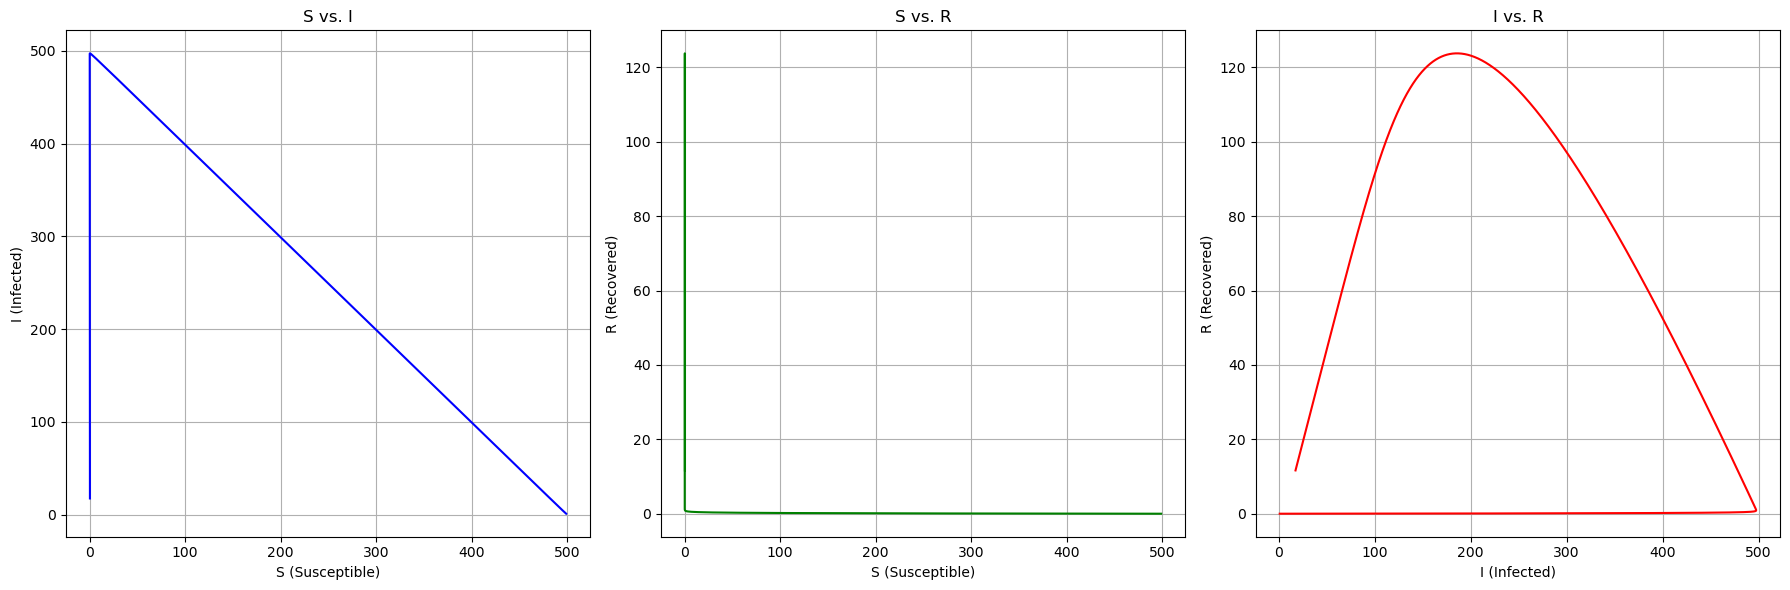

In [ ]:
# Definisi parameter model yang diperbarui
def spd_updated(z, t):
    A = 0.1
    beta = 0.05  # Perubahan parameter beta
    delta = 0.006  # Perubahan parameter delta
    mu1 = 0.005
    mu2 = 0.006
    mu3 = 0.001
    epsilon = 0.008

    S = z[0]
    I = z[1]
    R = z[2]

    dSdt = A - beta * S * I - mu2 * S + epsilon * R
    dIdt = beta * S * I - mu1 * I - delta * I
    dRdt = delta * I - epsilon * R - mu3 * R

    return [dSdt, dIdt, dRdt]

# Kondisi awal
x0 = [499, 1, 0]
t = np.linspace(0, 3000, 100000)

# Solusi numerik untuk parameter yang diperbarui
solusi_updated = odeint(spd_updated, x0, t)
S_updated = solusi_updated[:, 0]
I_updated = solusi_updated[:, 1]
R_updated = solusi_updated[:, 2]

# Plot potret fase untuk parameter yang diperbarui
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# S vs. I
axs[0].plot(S_updated, I_updated, color='blue')
axs[0].set_title("S vs. I")
axs[0].set_xlabel("S (Susceptible)")
axs[0].set_ylabel("I (Infected)")
axs[0].grid()

# S vs. R
axs[1].plot(S_updated, R_updated, color='green')
axs[1].set_title("S vs. R")
axs[1].set_xlabel("S (Susceptible)")
axs[1].set_ylabel("R (Recovered)")
axs[1].grid()

# I vs. R
axs[2].plot(I_updated, R_updated, color='red')
axs[2].set_title("I vs. R")
axs[2].set_xlabel("I (Infected)")
axs[2].set_ylabel("R (Recovered)")
axs[2].grid()

plt.tight_layout()
plt.show()


Berikut adalah potret fase hubungan antara S vs I, S vs R, dan I vs R.

#### Analisis Sensitivitas 3D

Analisis Sensitivitas terhadap Beta:
Beta = 0.0005, Sensitivitas = 1.0000
Beta = 0.0007, Sensitivitas = 1.0000
Beta = 0.0009, Sensitivitas = 1.0000


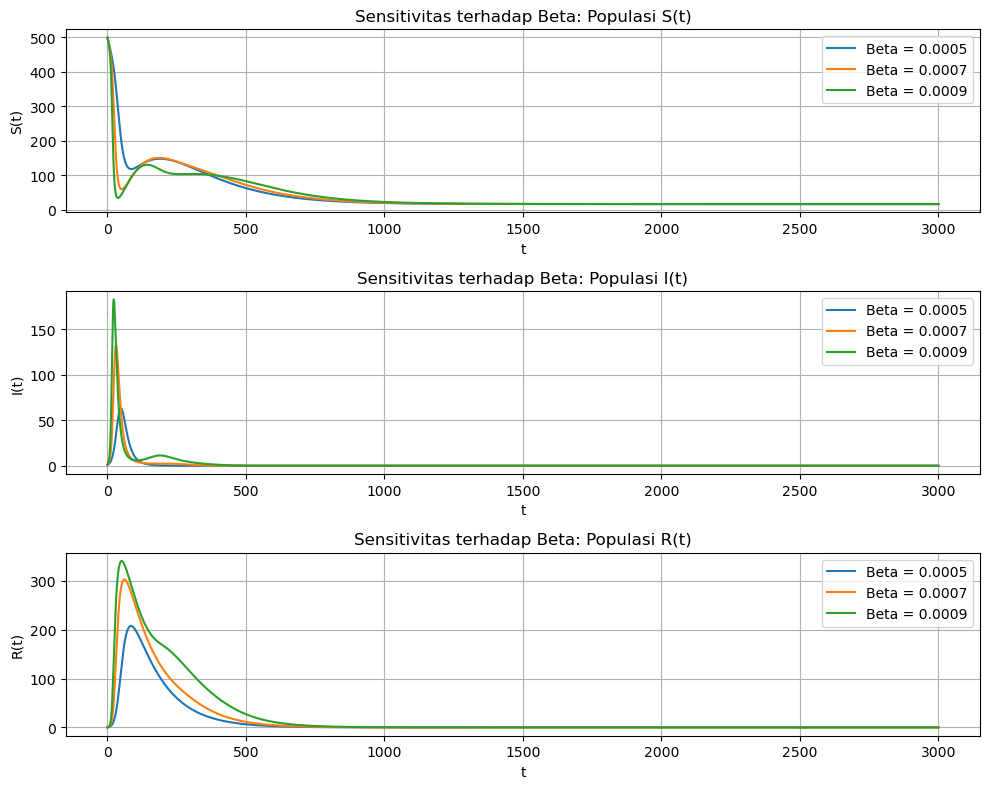

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def spd(z,t, A, beta, delta, mu1, mu2, mu3, epsilon) :
    S = z[0]
    I = z[1]
    R = z[2]

    dSdt = A - beta*S*I - mu2*S + epsilon*R
    dIdt = beta*S*I - mu1*I - delta*I
    dRdt = delta*I - epsilon*R - mu3*R

    return [dSdt, dIdt, dRdt]

def R0(beta, delta, mu1, epsilon):
    return beta / (mu1 + delta + epsilon)

def sensitivity_R0(beta, delta, mu1, epsilon, param_name, param_value):
    # Partial derivatives
    if param_name == 'beta':
        dR0_dp = 1 / (mu1 + delta + epsilon)
    elif param_name == 'mu1':
        dR0_dp = -beta / (mu1 + delta + epsilon)**2
    elif param_name == 'delta':
        dR0_dp = -beta / (mu1 + delta + epsilon)**2
    elif param_name == 'epsilon':
        dR0_dp = -beta / (mu1 + delta + epsilon)**2
    else:
        raise ValueError("Parameter not recognized")

    R0_value = R0(beta, delta, mu1, epsilon)
    sensitivity = dR0_dp * (param_value / R0_value)
    return sensitivity

# Parameter default
A = 0.1
beta_values = [0.0005, 0.0007, 0.0009]  # Variasi beta
delta = 0.1
mu1 = 0.005
mu2 = 0.006
mu3 = 0.001
epsilon = 0.008

# Initial condition
x0 = [499, 1, 0]

# Time points
t = np.linspace(0, 3000, 100000)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 8), dpi=100)

for beta in beta_values:
    solusi = odeint(spd, x0, t, args=(A, beta, delta, mu1, mu2, mu3, epsilon))
    S = solusi[:, 0]
    I = solusi[:, 1]
    R = solusi[:, 2]

    ax[0].plot(t, S, label=f"Beta = {beta}")
    ax[1].plot(t, I, label=f"Beta = {beta}")
    ax[2].plot(t, R, label=f"Beta = {beta}")

# Sensitivity analysis
print("Analisis Sensitivitas terhadap Beta:")
for beta in beta_values:
    sens = sensitivity_R0(beta, delta, mu1, epsilon, 'beta', beta)
    print(f"Beta = {beta}, Sensitivitas = {sens:.4f}")

# Configure plots
ax[0].set_title('Sensitivitas terhadap Beta: Populasi S(t)')
ax[0].set(xlabel='t', ylabel='S(t)')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Sensitivitas terhadap Beta: Populasi I(t)')
ax[1].set(xlabel='t', ylabel='I(t)')
ax[1].legend()
ax[1].grid()

ax[2].set_title('Sensitivitas terhadap Beta: Populasi R(t)')
ax[2].set(xlabel='t', ylabel='R(t)')
ax[2].legend()
ax[2].grid()

plt.tight_layout()
plt.show()

# Penjelasan Output:
# 1. Fungsi "spd" menggambarkan model SIRS yang melibatkan tiga kompartemen: Susceptible (S), Infected (I), dan Recovered (R).
# 2. Fungsi "R0" menghitung nilai reproduksi dasar R0 dari model.
# 3. Fungsi "sensitivity_R0" melakukan analisis sensitivitas R0 terhadap parameter (misalnya beta, delta, mu1, epsilon).
# 4. Grafik menunjukkan dinamika populasi S(t), I(t), dan R(t) untuk variasi nilai beta.
# 5. Analisis sensitivitas R0 ditampilkan dalam bentuk nilai numerik untuk setiap nilai beta.


Berikut adalah hasil analisis sensitivitas, dimana semakin besar nilai beta maka Bank Rentan akan semakin cepat turun. Sedangkan saat semakin besar nilai beta maka Bank Terinfeksi akan semakin cepat meningkat. Lalu, semakin besar nilai beta maka Bank Pulih akan semkain cepat naik, namun laju penurunannya semakin lambat.